<center><h1 style="color:#173F8A;"> Metodos para Ecuaciones Diferenciales, IMT3410, 2024-2 </h1></center>
<h3 style="color:#173F8A;text-align:right;"> Instituto de Ingenieria Matematica y Computacional<br>  Pontificia Universidad Catolica de Chile <br>  </h3>
<h3 style="color:#0176DE;text-align:right;"> Profesor. Manuel A. Sanchez<br> </h3>
<hr style="border:2px solid #03122E"> </hr>

<!-- Palette colors UC: celeste:#0176DE, azul #173F8A, azul oscuro: #03122E, amarillo: #FEC60D, amarillo oscuro: #E3AE00 -->
<!--
<figure>
<img align ="right" src="IMClogo.png" alt="logo" width="250" height="400"><br><br><br><br><br>
</figure>
 -->

# Metodo de diferencias finitas para la ecuacion de Poisson
\begin{equation}
-\Delta u = f, \quad \text{en } \Omega\subseteq \mathbb R^{d}, \qquad u=g,\quad \text{sobre } \partial \Omega
\end{equation}

In [1]:
import numpy as np
from numpy import pi, sin
# !pip3 install pyevtk
from pyevtk.hl import gridToVTK,  pointsToVTK
import matplotlib.pyplot as plt
from matplotlib import cm

## En dimension $d=1$
\begin{equation}
- \frac{u_{j-1}-2u_{j} + u_{j+1}}{h^{2}} = f_{j}, \quad 1\leq j \leq n-1, \qquad u_0=g(x_0),\,u_n = g(x_n)
\end{equation}

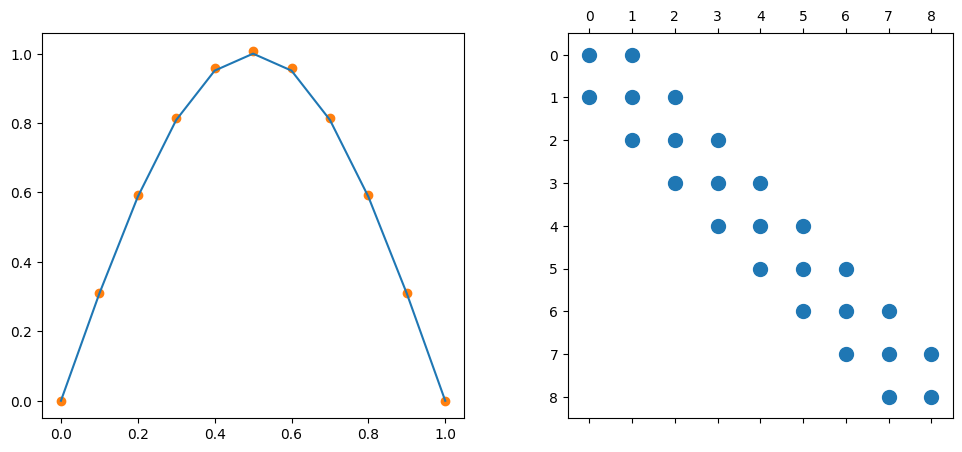

In [5]:
ufun1D = lambda x: sin(pi*x)
g1D = lambda x: ufun1D(x)
f1D = lambda x: (pi)**2*sin(pi*x)
nx = 10
lx = 1.0
x = np.linspace(0,lx,nx+1)
dx = lx/nx
A1D = np.diag(2.0*np.ones(nx-1)) + np.diag(-1.0*np.ones(nx-2),1)+ np.diag(-1.0*np.ones(nx-2),-1)
F1D = f1D(x[1:nx])
uhsol = np.zeros(nx+1)
uhsol[0] = g1D(x[0])
uhsol[nx] = g1D(x[nx])
uhsol[1:nx] = np.linalg.solve(A1D,dx**2*F1D)
fig, ax = plt.subplots(1,2, figsize=(12,5))
ax[1].spy(A1D,  marker='o')
ax[0].plot(x, uhsol,color='C01', marker='o', linestyle='None')
ax[0].plot(x, ufun1D(x))
plt.show()

## En dimension $d=2$

\begin{equation}
- \frac{u_{i+1,j}+u_{i,j+1}-4u_{i,j} + u_{i-1,j}+u_{i,j-1} }{h^{2}} = f_{ij}, \quad 1\leq i,j,\leq n-1
\end{equation}
y
\begin{equation}
u_{i,j} = g(x_{i,j}), \quad \{i,j=0 \wedge i,j=n \}
\end{equation}


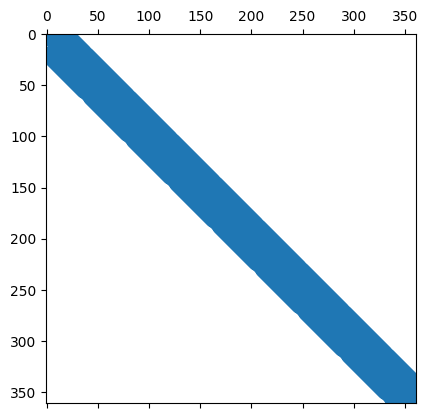

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 41, 42, 62, 63, 83, 84, 104, 105, 125, 126, 146, 147, 167, 168, 188, 189, 209, 210, 230, 231, 251, 252, 272, 273, 293, 294, 314, 315, 335, 336, 356, 357, 377, 378, 398, 399, 419, 420, 421, 422, 423, 424, 425, 426, 427, 428, 429, 430, 431, 432, 433, 434, 435, 436, 437, 438, 439, 440]
(361, 361) 361


In [6]:
ufun2D = lambda x,y: np.sin(np.pi*x)*np.sin(np.pi*y)
f2D = lambda x,y: 2*np.pi**2*np.sin(np.pi*x)*np.sin(np.pi*y)

n = 20
# Two dimensional grid
nx, ny, nz = n, n, 1
lx, ly = 1.0, 1.0 
dx, dy = lx/(nx), ly/(ny)
npoints = (nx ) * (ny ) * (nz ) 
x = np.linspace(0, lx , nx+1) 
y = np.linspace(0, ly , ny+1) 
z = [0]

Ix = np.eye(nx-1)
Iy = np.eye(ny-1)
A1Dx = np.diag(2.0*np.ones(nx-1)) + np.diag(-1.0*np.ones(nx-2),1)+ np.diag(-1.0*np.ones(nx-2),-1)
A1Dy = np.diag(2.0*np.ones(ny-1)) + np.diag(-1.0*np.ones(ny-2),1)+ np.diag(-1.0*np.ones(ny-2),-1)

A2D = np.kron(A1Dx, Iy) + np.kron(Ix,A1Dy)
plt.spy(A2D, marker='o')
plt.show()





Xplot = np.zeros((nx+1 , ny+1, 1 ))
Yplot = np.zeros((nx+1 , ny+1, 1 ))
Zplot = np.zeros((nx+1 , ny+1, 1 ))
Uhplot = np.zeros((nx+1, ny+1, 1 ))
USOL = np.zeros((nx+1, ny+1, 1 ))
b = np.zeros((nx+1,ny+1))

Dirichletnode =[]
k=0
for j in range(ny+1):
    for i in range(nx+1):
        Xplot[i,j,0] = x[i]
        Yplot[i,j,0] = y[j]
        USOL[i,j,0] = ufun2D(x[i],y[j])
        # Not on the boundary
        if i>0 and i <nx and j>0 and j<ny:
            b[i,j] = f2D(x[i],y[j])
        else:
            Dirichletnode.append(k)
        k+=1
print(Dirichletnode)
b = b.reshape((nx+1)*(ny+1))
Intnodes= np.setdiff1d(range((nx+1)*(ny+1)), Dirichletnode)
uhsol = np.zeros((nx+1)*(ny+1))
print(A2D.shape, b[Intnodes].size)
uhsol[Intnodes] = np.linalg.solve(A2D,dx**2*b[Intnodes])
Uhsol = uhsol.reshape((nx+1,ny+1))


c:\users\manuel sánchez\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:2: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  


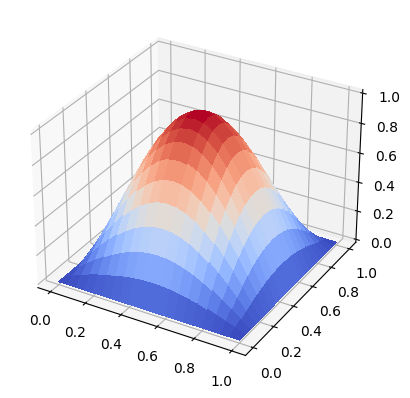

In [7]:
fig = plt.figure()
ax = fig.gca(projection='3d')
# Plot the surface.
X, Y = np.meshgrid(x,y)
surf = ax.plot_surface(X, Y, Uhsol, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)


![title](approx2D.png)

##  Solver 3D problem
\begin{equation}
-\frac{u_{i+1,j,k}+u_{i,j+1,k}+u_{i,j,k+1}-6u_{i,j,k} + u_{i-1,j,k}+u_{i,j-1,k}+u_{i,j,k-1}}{h^{2}} = f_{i,j,k}
\end{equation}

\begin{equation}
u(x,y,z) = \sin(\pi x)\sin(\pi y)\sin(\pi z)
\end{equation}
\begin{equation}
f(x,y,z) = 3\pi^{2}\sin(\pi x)\sin(\pi y)\sin(\pi z)
\end{equation}

In [14]:
n = 4
nx, ny, nz = n, n, n
lx, ly, lz = 1.0, 1.0, 1.0 
dx, dy, dz = lx/(nx), ly/(ny), lz/(nz)
npoints = (nx+1) * (ny+1) * (nz+1) 
Ix = np.eye(nx-1)
Iy = np.eye(ny-1)
Iz = np.eye(nz-1)

A1D = np.diag(2.0*np.ones(ny-1)) + np.diag(-1.0*np.ones(ny-2),1)+ np.diag(-1.0*np.ones(ny-2),-1)

A3D = np.kron(np.kron(A1D,Iy),Iz)+np.kron(np.kron(Ix,A1D),Iz)+np.kron(np.kron(Ix,Iy),A1D)
#plt.spy(S3D, aspect='equal')
#plt.show()

ufun3D =  lambda x,y,z: np.sin(np.pi*x)*np.sin(np.pi*y)*np.sin(np.pi*z)
f3D = lambda x,y,z: 3*np.pi**2*np.sin(np.pi*x)*np.sin(np.pi*y)*np.sin(np.pi*z)
# Three dimensional grid

x = np.linspace(0, lx , nx+1) 
y = np.linspace(0, ly , ny+1) 
z = np.linspace(0, lz , nz+1) 

Xplot = np.zeros(( nx+1, ny+1, nz+1 ))
Yplot = np.zeros(( nx+1, ny+1, nz+1 ))
Zplot = np.zeros(( nx+1, ny+1, nz+1 ))
Uhplot3D = np.zeros(( nx+1, ny+1, nz+1 ))
USOL3D = np.zeros(( nx+1, ny+1, nz+1 ))

b3D = np.zeros((nx+1,ny+1,nz+1))
Dirichletnode=[]
ele=0
for k in range(nz+1):
    for j in range(ny+1):
        for i in range(nx+1):
            Xplot[i,j,k] = x[i]
            Yplot[i,j,k] = y[j]
            Zplot[i,j,k] = z[k]
            USOL3D[i,j,k] = ufun3D(x[i],y[j],z[k])
            # Not on the boundary
            if i>0 and i <nx and j>0 and j<ny and k>0 and k<nz:
                b3D[i,j,k] = f3D(x[i],y[j],z[k])
            else:
                Dirichletnode.append(ele)
            ele+=1
b3D = b3D.reshape((nx+1)*(ny+1)*(nz+1))

Intnodes= np.setdiff1d(range((nx+1)*(ny+1)*(nz+1)), Dirichletnode)
uhsol = np.zeros((nx+1)*(ny+1)*(nz+1))

print(A3D.shape)
print(b3D[Intnodes].shape)
uhsol[Intnodes] = np.linalg.solve(A3D,dx**2*b3D[Intnodes])
Uhsol = uhsol.reshape((nx+1,ny+1,nz+1))



(27, 27)
(27,)


![title](approx3D.png)

In [68]:
nx = 10; h = 1.0/nx
p = 2.0;  q=1.0; r = -2*pi**2
A  = (p/h**2)*(np.diag(2.0*np.ones(nx-1)) + np.diag(-1.0*np.ones(nx-2),1)+ np.diag(-1.0*np.ones(nx-2),-1)) 
Ar = A + r*np.eye(nx-1)+ q/(2*h)*np.diag(-1.0*np.ones(nx-2),-1)+ q/(2*h)*np.diag(1.0*np.ones(nx-2),1)
mus = [-p*(2.0/h**2)*(np.cos(j*pi*h)-1) for j in range(1,nx)]
u = np.asarray([[sin(j*pi*i*h) for j in range(1,nx)] for i in range(1,nx)])

print(A.dot(u[:,1]) - mus[1]*u[:,1])

[ 3.55271368e-14 -2.84217094e-14  1.42108547e-14  0.00000000e+00
 -3.00216124e-15 -1.42108547e-14  2.84217094e-14  0.00000000e+00
 -7.81597009e-14]


In [70]:
# lambdas = [-p*(2.0/h**2)*(np.cos(j*pi*h)-1)+r for j in range(1,nx)]
a = 2*p/h**2 + r; b = -p/h**2 + q/(2*h); c = -p/h**2 - q/(2*h)
lambdas = [a+2*np.sqrt(b*c)*np.cos(j*pi*h) for j in range(1,nx)]
munp, unp = np.linalg.eig(A)
lanp, unp = np.linalg.eig(Ar)

print(munp)
print(lanp)
print(lambdas)

[ 19.57739348  76.39320225 164.88589908 276.39320225 400.
 780.42260652 723.60679775 523.60679775 635.11410092]
[-4.29146746e-02  5.67551364e+01  1.45220175e+02  2.56692627e+02
  3.80260791e+02  7.60564497e+02  7.03766446e+02  5.03828956e+02
  6.15301407e+02]
[760.564497070216, 703.7664460174503, 615.3014074745042, 503.8289557861283, 380.2607911978212, 256.69262660951415, 145.22017492113827, 56.75513637819216, -0.04291467457358067]


In [63]:

lambdaabs = [np.abs(l) for l in lambdas]
rhoAqinv = 1.0/np.min(lambdaabs)
print(rhoAqinv)

55.45657185199232
